# Real Estate Prediction

# Content

- <a href = '#1'>Introduction</a>  
- <a href = '#2'>Load Packages</a>  
- <a href = '#3'>Load Data</a>  
- <a href = '#4'>Data Quality Check</a>  
- <a href = '#5'>Explore Data</a>
    - <a href = '#51'>Correlation Values</a>
    - <a href = '#52'>Categorical Variables</a>
    - <a href = '#52'>Create a Test Set</a>
- <a href = '#6'>Prep Data for Machine Learning</a>  
    - <a href = '#61'>Missing Values</a> 
    - <a href = '#62'>Transaction Date</a>     
    - <a href = '#63'>Encoding</a> 
    - <a href = '#64'>Feature Scaling</a> 
    - <a href = '#65'>Columns to drop/add</a> 
    - <a href = '#66'>Feature Engineering</a>
- <a href = '#7'>Transformation Pipeline</a>
- <a href = '#8'>Train Model</a>
    - <a href = '#81'>Baseline Model - Linear Regression</a> 
    - <a href = '#82'>Gradient Boosting Regression</a> 
    - <a href = '#83'>Feature Importance</a> 
- <a href = '#9'>Next Steps</a>

## <a id = '1'>Introduction</a>  

[Zillow's](https://www.zillow.com/) Zestimate home valuation has shaken up the U.S. real estate industry since first released 11 years ago.

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important. The Zestimate was created to give consumers as much information as possible about homes and the housing market, marking the first time consumers had access to this type of home value information at no cost.

“Zestimates” are estimated home values based on 7.5 million statistical and machine learning models that analyze hundreds of data points on each property. And, by continually improving the median margin of error (from 14% at the onset to 5% today), Zillow has since become established as one of the largest, most trusted marketplaces for real estate information in the U.S. and a leading example of impactful machine learning.

This project is based on the [Zillow Prize Competition](https://www.kaggle.com/c/zillow-prize-1/overview) on Kaggle and its goal is to develop an algorithm that makes predictions about the future sale prices of homes.

![image](https://cdn.geekwire.com/wp-content/uploads/2020/02/Annotation-2020-02-18-093710.png) <br><br>


In this competition, Zillow is asking you to predict the log-error between their Zestimate and the actual sale price, given all the features of a home. The log error is defined as <br> <br>

<a><center>*logerror = log(Zestimate) − log(SalePrice)*</center></a>
    
<br><br>
and it is recorded in the transactions file train.csv. In this competition, you are going to predict the logerror for the months in Fall 2017. Since all the real estate transactions in the U.S. are publicly available, we will close the competition (no longer accepting submissions) before the evaluation period begins.

## <a id = '2'>Load Packages</a>  

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

## <a id = '3'>Load Data</a>  

In [2]:
# properties listed on Zillow

properties = pd.read_csv('data/properties_2016.csv')

properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [3]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   airconditioningtypeid         float64
 2   architecturalstyletypeid      float64
 3   basementsqft                  float64
 4   bathroomcnt                   float64
 5   bedroomcnt                    float64
 6   buildingclasstypeid           float64
 7   buildingqualitytypeid         float64
 8   calculatedbathnbr             float64
 9   decktypeid                    float64
 10  finishedfloor1squarefeet      float64
 11  calculatedfinishedsquarefeet  float64
 12  finishedsquarefeet12          float64
 13  finishedsquarefeet13          float64
 14  finishedsquarefeet15          float64
 15  finishedsquarefeet50          float64
 16  finishedsquarefeet6           float64
 17  fips                          float64
 18  fireplacecnt          

In [4]:
# train dataset (provided by Kaggle)

train_raw = pd.read_csv('data/train_2016_v2.csv')

train_raw.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [5]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   parcelid         90275 non-null  int64  
 1   logerror         90275 non-null  float64
 2   transactiondate  90275 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


## <a id = '4'>Data Quality Check</a>  

In [6]:
# check for null values

properties.isnull().any()

parcelid                        False
airconditioningtypeid            True
architecturalstyletypeid         True
basementsqft                     True
bathroomcnt                      True
bedroomcnt                       True
buildingclasstypeid              True
buildingqualitytypeid            True
calculatedbathnbr                True
decktypeid                       True
finishedfloor1squarefeet         True
calculatedfinishedsquarefeet     True
finishedsquarefeet12             True
finishedsquarefeet13             True
finishedsquarefeet15             True
finishedsquarefeet50             True
finishedsquarefeet6              True
fips                             True
fireplacecnt                     True
fullbathcnt                      True
garagecarcnt                     True
garagetotalsqft                  True
hashottuborspa                   True
heatingorsystemtypeid            True
latitude                         True
longitude                        True
lotsizesquar

In [7]:
# check for null values

train_raw.isnull().any()

parcelid           False
logerror           False
transactiondate    False
dtype: bool

In [8]:
# how many train records don't have a matching property

len(set(train_raw.parcelid) - set(properties.parcelid))

0

In [9]:
# how many properties don't have a matching train record

len(set(properties.parcelid) - set(train_raw.parcelid))

2895067

So there are a lot of properties that don't have a corresponding target. Let's remove them for now to free up memory.

In [10]:
# merge the data and remove the raw datasets

train_merged = pd.merge(train_raw, properties, how = 'left', on = 'parcelid')


# deleting to free memory
del train_raw
del properties

In [11]:
train_merged.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [12]:
train_merged.shape

(90275, 60)

In [13]:
# is there only one record per property? 

train_merged.parcelid.nunique() == len(train_merged)

False

Seems like there are properties with more than one transaction. Let's dive deeper into this.

In [14]:
from helpers import check_duplicates

In [15]:
duplicates, non_duplicates = check_duplicates(train_merged)

print(duplicates.parcelid.nunique())

124


It appears that some homes were sold twice during the period that the training data was captured. We have a few options here, and it's just as imporatant to discuss the tradeoffs between them as choosing the "right" one.

We know that we don't want the model to overweight properties that have more than one record because we want it to perform well on our holdout set. On the other hand, there is valuable information in knowing that the only difference between two records (besides our target variable) is the date field.

So for constructing the dataset for training our model, we could:

- Use the most recent sales record
- Use the oldest sales record
- Use both sales records
- Use a random sales record
- Engineer a feature from the information contained, and then choose one of the above

Note that only a hundred or so of the 90,000-ish properties have multiple transactions, so it probably isn't a big deal whatever we choose, so lets go with a simple solution for now, which is taking a random sale record for each parcel with more than one sale record.

In [16]:
from helpers import filter_duplicates

In [17]:
train_unique = filter_duplicates(train_merged)

In [18]:
train_unique.shape

(90150, 60)

In [19]:
# check if the same properties exist in the original dataset as the reduced dataset

assert set(train_unique.parcelid) == set(train_merged.parcelid)

We can proceed to explore the data now!

## <a id = '5'>Explore Data</a>  

### <a id = '51'>Correlation Values</a>  

In [20]:
corr = train_unique.corr()
corr['logerror']

parcelid                        0.004717
logerror                        1.000000
airconditioningtypeid           0.005286
architecturalstyletypeid       -0.004354
basementsqft                    0.253395
bathroomcnt                     0.028188
bedroomcnt                      0.025986
buildingclasstypeid                  NaN
buildingqualitytypeid          -0.009709
calculatedbathnbr               0.029405
decktypeid                           NaN
finishedfloor1squarefeet        0.026066
calculatedfinishedsquarefeet    0.038971
finishedsquarefeet12            0.042018
finishedsquarefeet13            0.034715
finishedsquarefeet15            0.019466
finishedsquarefeet50            0.023446
finishedsquarefeet6             0.043032
fips                            0.008269
fireplacecnt                    0.033127
fullbathcnt                     0.028817
garagecarcnt                    0.026411
garagetotalsqft                 0.023845
heatingorsystemtypeid          -0.024706
latitude        

In [21]:
corr_values = corr['logerror'].sort_values(ascending = False)

In [22]:
corr_values.dropna(inplace = True)

Let's drop variables that have very weak correlation to the target variable.

In [23]:
indexNames = corr_values[ (corr_values <= 0.01) & (corr_values >= -0.01) ].index

In [24]:
indexNames

Index(['censustractandblock', 'rawcensustractandblock', 'fips', 'roomcnt',
       'taxvaluedollarcnt', 'airconditioningtypeid', 'latitude',
       'lotsizesquarefeet', 'parcelid', 'propertylandusetypeid',
       'regionidcounty', 'poolsizesum', 'regionidcity',
       'landtaxvaluedollarcnt', 'longitude', 'unitcnt',
       'architecturalstyletypeid', 'regionidneighborhood', 'regionidzip',
       'taxamount', 'buildingqualitytypeid'],
      dtype='object')

In [25]:
corr_values.drop(indexNames, inplace = True)

In [26]:
corr_values

logerror                        1.000000
basementsqft                    0.253395
yardbuildingsqft26              0.086179
finishedsquarefeet6             0.043032
finishedsquarefeet12            0.042018
calculatedfinishedsquarefeet    0.038971
finishedsquarefeet13            0.034715
threequarterbathnbr             0.034077
fireplacecnt                    0.033127
calculatedbathnbr               0.029405
fullbathcnt                     0.028817
bathroomcnt                     0.028188
garagecarcnt                    0.026411
finishedfloor1squarefeet        0.026066
bedroomcnt                      0.025986
garagetotalsqft                 0.023845
finishedsquarefeet50            0.023446
structuretaxvaluedollarcnt      0.020692
finishedsquarefeet15            0.019466
yearbuilt                       0.017182
numberofstories                 0.013162
taxdelinquencyyear             -0.012973
typeconstructiontypeid         -0.022440
yardbuildingsqft17             -0.023720
heatingorsystemt

In [27]:
# prepare list of columns to drop for preprocessing

drop_cols = list(indexNames)

# remove the below features, to be used for feature engineering

drop_cols.remove('latitude')
drop_cols.remove('longitude')
drop_cols.remove('roomcnt')
drop_cols.remove('taxvaluedollarcnt')
drop_cols.remove('landtaxvaluedollarcnt')
drop_cols.remove('taxamount')

In [28]:
train_unique.drop(drop_cols, axis = 1, inplace = True)

train_unique.shape

(90150, 45)

### <a id = '52'>Categorical Variables</a>  

In [29]:
categorical_cols = train_unique.dtypes[train_unique.dtypes == 'object'].index

categorical_cols

Index(['transactiondate', 'hashottuborspa', 'propertycountylandusecode',
       'propertyzoningdesc', 'fireplaceflag', 'taxdelinquencyflag'],
      dtype='object')

In [30]:
for i in categorical_cols:
    unique_val = train_unique[i].nunique()
    print('Number of unique values in {} is {}'.format(i, unique_val))

Number of unique values in transactiondate is 352
Number of unique values in hashottuborspa is 1
Number of unique values in propertycountylandusecode is 77
Number of unique values in propertyzoningdesc is 1996
Number of unique values in fireplaceflag is 1
Number of unique values in taxdelinquencyflag is 1


Checking categorical variables with one value.

In [31]:
train_unique['hashottuborspa'].value_counts()

True    2363
Name: hashottuborspa, dtype: int64

In [32]:
# fill null values for 'hashottuborspa'

train_unique['hashottuborspa'].fillna('False', inplace = True)
train_unique['hashottuborspa'].value_counts()

False    87787
True      2363
Name: hashottuborspa, dtype: int64

In [33]:
train_unique['fireplaceflag'].value_counts()

True    220
Name: fireplaceflag, dtype: int64

In [34]:
# fill null values for 'fireplaceflag'

train_unique['fireplaceflag'].fillna('False', inplace = True)
train_unique['fireplaceflag'].value_counts()

False    89930
True       220
Name: fireplaceflag, dtype: int64

In [35]:
train_unique['taxdelinquencyflag'].value_counts()

Y    1775
Name: taxdelinquencyflag, dtype: int64

In [36]:
# fill null values for 'taxdelinquencyflag'

train_unique['taxdelinquencyflag'].fillna('N', inplace = True)
train_unique['taxdelinquencyflag'].value_counts()

N    88375
Y     1775
Name: taxdelinquencyflag, dtype: int64

In [37]:
# drop 'propertycountylandusecode' and 'propertyzoningdesc' (high number of unique values)

train_unique.drop(['propertycountylandusecode', 'propertyzoningdesc'], axis = 1, inplace = True)

train_unique.shape

(90150, 43)

In [38]:
drop_cols.extend(['propertycountylandusecode', 'propertyzoningdesc'])

drop_cols

['censustractandblock',
 'rawcensustractandblock',
 'fips',
 'airconditioningtypeid',
 'lotsizesquarefeet',
 'parcelid',
 'propertylandusetypeid',
 'regionidcounty',
 'poolsizesum',
 'regionidcity',
 'unitcnt',
 'architecturalstyletypeid',
 'regionidneighborhood',
 'regionidzip',
 'buildingqualitytypeid',
 'propertycountylandusecode',
 'propertyzoningdesc']

In [39]:
# number of unique values

train_unique.nunique().sort_values(ascending = False)

taxamount                       85110
latitude                        73312
longitude                       71900
landtaxvaluedollarcnt           57066
taxvaluedollarcnt               55938
structuretaxvaluedollarcnt      55450
calculatedfinishedsquarefeet     5102
finishedsquarefeet12             4982
finishedsquarefeet15             1915
finishedsquarefeet50             1898
logerror                         1893
finishedfloor1squarefeet         1886
garagetotalsqft                   870
yardbuildingsqft17                567
finishedsquarefeet6               360
transactiondate                   352
yearbuilt                         130
yardbuildingsqft26                 73
basementsqft                       39
bathroomcnt                        23
calculatedbathnbr                  22
roomcnt                            17
bedroomcnt                         17
garagecarcnt                       15
fullbathcnt                        14
heatingorsystemtypeid              12
finishedsqua

Let's look at the variables concerning 'pool' next.

In [40]:
train_unique['poolcnt'].value_counts()

1.0    17876
Name: poolcnt, dtype: int64

Since all the properties that have a pool have only one pool, we can replace the 4 variables on pools with a categorical variable 'has_pool'.

In [41]:
train_unique['has_pool'] = ['Yes' if i == 1 else 'No' for i in train_unique['poolcnt']]

train_unique['has_pool'].value_counts()

No     72274
Yes    17876
Name: has_pool, dtype: int64

In [42]:
train_unique.drop(['poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7'], 
                 axis = 1, inplace = True)

train_unique.shape

(90150, 40)

Drop values with zero correlation to the target variable.

In [43]:
train_unique.drop(['storytypeid', 'assessmentyear', 'decktypeid', 'buildingclasstypeid'], 
                 axis = 1, inplace = True)

train_unique.shape

(90150, 36)

In [44]:
drop_cols.extend(['poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 
                     'storytypeid', 'assessmentyear', 'decktypeid', 'buildingclasstypeid'])

In [45]:
drop_cols

['censustractandblock',
 'rawcensustractandblock',
 'fips',
 'airconditioningtypeid',
 'lotsizesquarefeet',
 'parcelid',
 'propertylandusetypeid',
 'regionidcounty',
 'poolsizesum',
 'regionidcity',
 'unitcnt',
 'architecturalstyletypeid',
 'regionidneighborhood',
 'regionidzip',
 'buildingqualitytypeid',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'poolcnt',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'storytypeid',
 'assessmentyear',
 'decktypeid',
 'buildingclasstypeid']

In [46]:
train_unique.to_csv('data/train_cleaned.csv')

### <a id = '53'>Create a Test Set</a>  

In [47]:
# split features and target variable
    
target = train_unique['logerror']
features = train_unique.drop(['logerror'], axis = 1)

In [48]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                             target,
                                                                             test_size = 0.2, 
                                                                             random_state = 42, 
                                                                             shuffle = True)

In [49]:
features_train.shape

(72120, 35)

In [50]:
target_train.head()

84051   -0.0502
21336   -0.1188
3793     0.0334
78283   -0.0010
24650   -0.0502
Name: logerror, dtype: float64

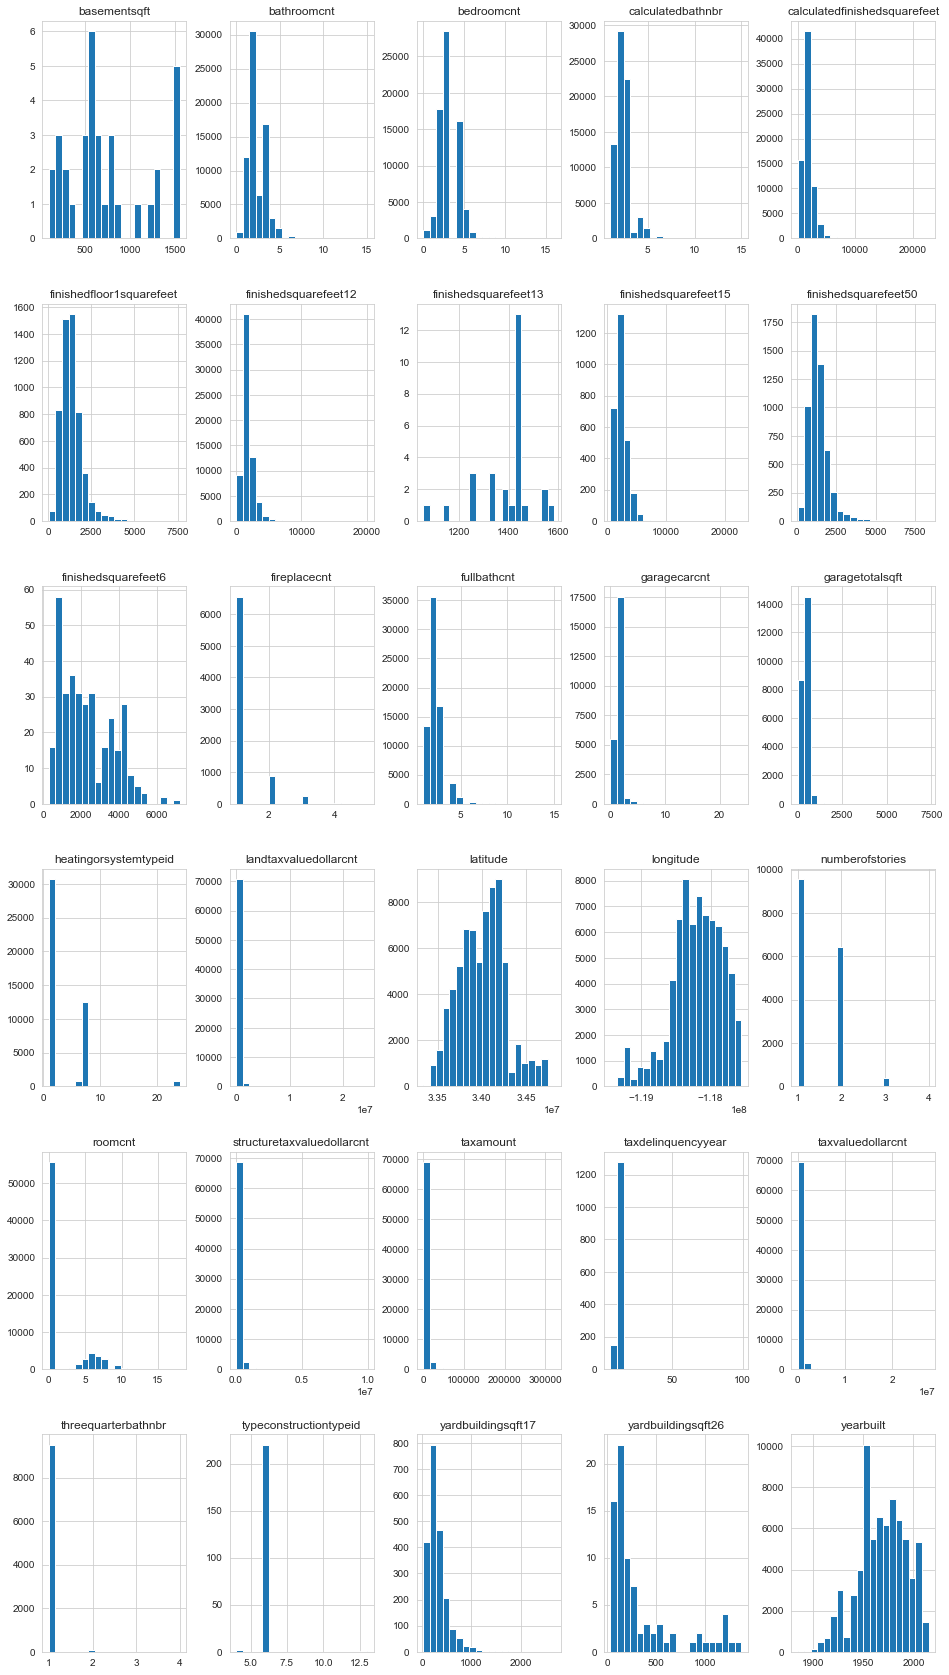

In [51]:
# check distribution

features_train.hist(figsize = (16, 30), bins = 20);

## <a id = '6'>Prep Data for Machine Learning</a>  

### <a id = '61'>Missing Values</a>  

An easy imputation strategy would be to make an educated assumption that all the numeric variables are positive and encode missing values with a -1. Let's check that assumption:

In [52]:
features_train.loc[:, features_train.isna().sum() > 0].min()

basementsqft                     100.00
calculatedbathnbr                  1.00
finishedfloor1squarefeet          47.00
calculatedfinishedsquarefeet       2.00
finishedsquarefeet12               2.00
finishedsquarefeet13            1056.00
finishedsquarefeet15             560.00
finishedsquarefeet50              47.00
finishedsquarefeet6              300.00
fireplacecnt                       1.00
fullbathcnt                        1.00
garagecarcnt                       0.00
garagetotalsqft                    0.00
heatingorsystemtypeid              1.00
threequarterbathnbr                1.00
typeconstructiontypeid             4.00
yardbuildingsqft17                25.00
yardbuildingsqft26                34.00
yearbuilt                       1885.00
numberofstories                    1.00
structuretaxvaluedollarcnt       100.00
taxvaluedollarcnt                 22.00
landtaxvaluedollarcnt             22.00
taxamount                         49.08
taxdelinquencyyear                 6.00


There are no negative values, so we can go ahead and fill the null values with -1.

### <a id = '62'>Transaction Date</a> 

We will parse out the date as day/month/year and perform cyclical representation for day and month.

### <a id = '63'>Encoding</a> 

We would perform one-hot encoding on the categorical variables.

### <a id = '64'>Feature Scaling</a>

ML algorithms generally don't perform well when the input variables have very different scales. From the distribution charts above, the features have very different scales. Let's perform standardization to fix this.

### <a id = '65'>Columns to drop/add</a>

Columns to add - 'has_pool'

Columns to drop - 'censustractandblock', 'rawcensustractandblock', 'fips', 'airconditioningtypeid', 'lotsizesquarefeet', 'parcelid', 'propertylandusetypeid', 'regionidcounty', 'poolsizesum', 'regionidcity', 'unitcnt', 'architecturalstyletypeid', 'regionidneighborhood', 'regionidzip', 'buildingqualitytypeid', 'propertycountylandusecode', 'propertyzoningdesc', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid', 'assessmentyear', 'decktypeid', 'buildingclasstypeid'

In [53]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72120 entries, 84051 to 15917
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   transactiondate               72120 non-null  object 
 1   basementsqft                  34 non-null     float64
 2   bathroomcnt                   72120 non-null  float64
 3   bedroomcnt                    72120 non-null  float64
 4   calculatedbathnbr             71149 non-null  float64
 5   finishedfloor1squarefeet      5479 non-null   float64
 6   calculatedfinishedsquarefeet  71575 non-null  float64
 7   finishedsquarefeet12          68404 non-null  float64
 8   finishedsquarefeet13          28 non-null     float64
 9   finishedsquarefeet15          2804 non-null   float64
 10  finishedsquarefeet50          5479 non-null   float64
 11  finishedsquarefeet6           339 non-null    float64
 12  fireplacecnt                  7723 non-null   float64
 1

### <a id = '66'>Feature Engineering</a>

property_age -> 2020 - 'yearbuilt' <br>
total_rm_cnt -> 'bathroomcnt' + 'bedroomcnt' <br>
structure_value_psf -> 'structuretaxvaluedollarcnt' / 'calculatedfinishedsquarefeet' <br>
land_value_psf -> 'landtaxvaluedollarcnt' / 'calculatedfinishedsquarefeet' <br>
tax_value_psf -> 'taxvaluedollarcnt' / 'calculatedfinishedsquarefeet' <br>

### <a id = '7'>Transformation Pipeline</a>

We will create a function to handle the transformation required.

In [54]:
def transform(df):
    
    # fill null values
    df = df.fillna(-1)
    
    df['prop_age'] = 2020 - df['yearbuilt']
    df['total_rm_cnt'] = df['bathroomcnt'] + df['bedroomcnt']
    df['structure_value_psf'] = df['structuretaxvaluedollarcnt'] / df['calculatedfinishedsquarefeet']
    df['land_value_psf'] = df['landtaxvaluedollarcnt'] / df['calculatedfinishedsquarefeet']
    df['tax_value_psf'] = df['taxvaluedollarcnt'] / df['calculatedfinishedsquarefeet']
    
    # categorical features
    categorical_features = df.dtypes[df.dtypes == 'object'].index
    categorical_features = [x for x in categorical_features if 'date' not in x]
        
    # numerical features
    numerical_features = df.dtypes[df.dtypes == 'float64'].index
    
    # one-hot encoding
    df = pd.get_dummies(df, columns = categorical_features)

    # standardization
    scaled_df = df[numerical_features]
    scaler = StandardScaler().fit(scaled_df.values)
    scaled_df = scaler.transform(scaled_df.values)
    df[numerical_features] = scaled_df


    # convert transaction date column
    df['transactiondate'] = pd.to_datetime(df['transactiondate'])
    df['transaction_year'] = df['transactiondate'].dt.year
    df['transaction_month'] = df['transactiondate'].dt.month
    df['transaction_day'] = df['transactiondate'].dt.day
    
    
    # convert cyclical features
    df['transaction_day_sin'] = np.sin(df.transaction_day*(2.*np.pi/24))
    df['transaction_day_cos'] = np.cos(df.transaction_day*(2.*np.pi/24))
    df['transaction_month_sin'] = np.sin((df.transaction_month-1)*(2.*np.pi/12))
    df['transaction_month_cos'] = np.cos((df.transaction_month-1)*(2.*np.pi/12))

    df.drop(columns = ['transactiondate', 'transaction_month', 'transaction_day'], inplace = True)

    return df

In [55]:
features_train_transformed = transform(features_train)

In [56]:
features_train_transformed.head()

,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,...,fireplaceflag_False,taxdelinquencyflag_N,taxdelinquencyflag_Y,has_pool_No,has_pool_Yes,transaction_year,transaction_day_sin,transaction_day_cos,transaction_month_sin,transaction_month_cos
84051,-0.018596,-0.277820,-0.892855,-0.254424,3.110436,-0.442601,-0.321856,-0.019644,-0.182859,3.068642,...,1,1,0,1,0,2016,2.588190e-01,-0.965926,-1.000000,-1.836970e-16
21336,-0.018596,-1.275621,1.704393,-1.216693,-0.256362,-0.578588,-0.453802,-0.019644,-0.182859,-0.254682,...,1,1,0,1,0,2016,9.659258e-01,-0.258819,0.866025,5.000000e-01
3793,-0.018596,-0.277820,-0.892855,-0.254424,-0.256362,-0.676328,-0.548637,-0.019644,-0.182859,-0.254682,...,1,1,0,1,0,2016,-8.660254e-01,0.500000,0.000000,1.000000e+00
78283,-0.018596,-0.277820,-0.892855,-0.254424,-0.256362,-0.833562,-0.701199,-0.019644,-0.182859,-0.254682,...,1,1,0,1,0,2016,-5.000000e-01,0.866025,-0.866025,-5.000000e-01
24650,-0.018596,-0.277820,-0.027106,-0.254424,-0.256362,0.035477,0.142015,-0.019644,-0.182859,-0.254682,...,1,1,0,1,0,2016,1.224647e-16,-1.000000,1.000000,6.123234e-17


In [57]:
assert all(features_train_transformed.isna().sum() == 0) # nice!

## <a id = '8'>Train Model</a>

### <a id = '81'>Baseline Model - Linear Regression</a>

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lin_reg = LinearRegression()
lin_reg.fit(features_train_transformed, target_train)

LinearRegression()

In [60]:
pred = lin_reg.predict(features_train_transformed)

In [61]:
mean_absolute_error(target_train, pred)

0.06853630862493615

Text(0, 0.5, 'Predictions')

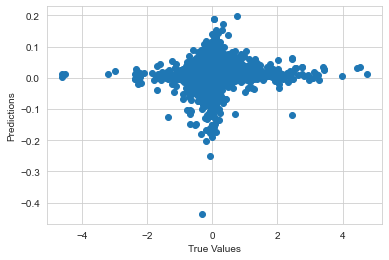

In [62]:
plt.scatter(target_train, pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

### <a id = '82'>Gradient Boosting Regression</a>

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
features_test_transformed = transform(features_test)

In [65]:
def select_params(X_train, X_test, y_train, y_test, max_estimators=1000, max_depth = 3, learning_rate=0.01):


    gbm = GradientBoostingRegressor(n_estimators = max_estimators, learning_rate=learning_rate, 
                                    max_depth=max_depth, loss='lad', subsample=0.5)

    gbm.fit(X_train, y_train)

    test_score = np.zeros((max_estimators,), dtype=np.float64)

    for i, y_pred in enumerate(gbm.staged_predict(X_test)):
        test_score[i] = mean_absolute_error(y_test, y_pred)
        
    print('optimal number of trees: {0}'.format(test_score.argmin()))
    print('best MAE: {0}'.format(test_score.min()))

    pd.Series(test_score).plot(title='learning curve for max_depth = {0}'.format(max_depth))
    plt.show()

***** training for max depth = 2 *****
optimal number of trees: 997
best MAE: 0.0665297653883381


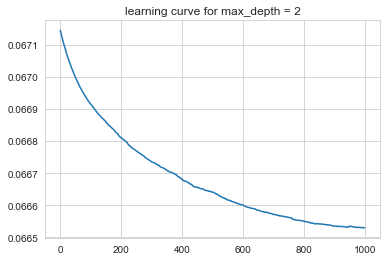

***** training for max depth = 3 *****
optimal number of trees: 985
best MAE: 0.06646409184800213


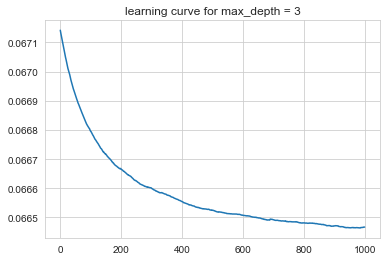

***** training for max depth = 4 *****
optimal number of trees: 667
best MAE: 0.06645704468900784


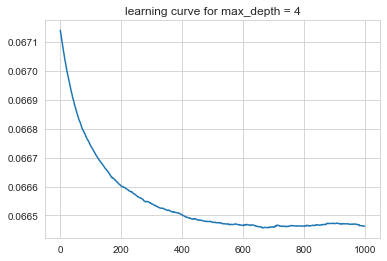

In [66]:
# tune max_depth

for depth in [2, 3, 4]:
    print('***** training for max depth = {0} *****'.format(depth))
    select_params(features_train_transformed, features_test_transformed, target_train, target_test, max_estimators=1000, max_depth=depth, learning_rate=0.01)

### <a id = '83'>Feature Importance</a>

In [67]:
gbm = GradientBoostingRegressor(n_estimators = 980, learning_rate=0.01, 
                                    max_depth=4, loss='lad', subsample=0.5)

In [68]:
gbm.fit(features_train_transformed, target_train)

GradientBoostingRegressor(learning_rate=0.01, loss='lad', max_depth=4,
                          n_estimators=980, subsample=0.5)

Text(0, 0.5, 'Feature Importance Score')

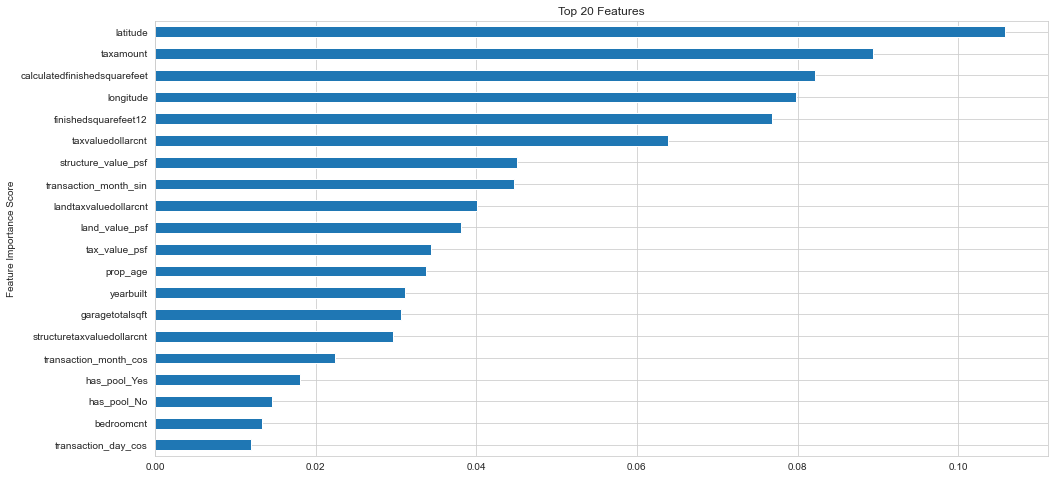

In [69]:
# get feature importance

predictors = list(features_train_transformed)

plt.figure(figsize = (16, 8))
feat_imp = pd.Series(gbm.feature_importances_, predictors).sort_values(ascending = False).nlargest(20)
feat_imp.plot(kind = 'barh', title = 'Top 20 Features').invert_yaxis()
plt.ylabel('Feature Importance Score')

Most of our new features are in the top 20 in terms of importance, means we are on the right track!

## <a id = '9'>Next Steps</a>

Feature engineering with geographical variables. Noticed how latitude and longitude are the 1st and 4th most important feature?

We can certainly create new features on these information to improve our model.

Some ideas:

- Average feature values for nearby homes
- Average difference in feature values vs nearby homes
- Get distance of property to the nearest main city